In [27]:
%reset -f

# Datos de Clorofila y Basemap

In [28]:
import numpy as np
import pandas as pd
import netCDF4 as nc

import matplotlib.pyplot as plt
import matplotlib.colors as colors


In [29]:
#data=nc.Dataset('../chlc/2014/01/noaacwNPPVIIRSSQchlaMonthly_9637_0f53_01f6_U1701732355136.nc')
data=nc.Dataset('../chlc/2014/02/noaacwNPPVIIRSSQchlaMonthly_9cc4_73a7_7146_U1701732356608.nc')

In [30]:
print(data.variables.keys() , '\n')
print('Metadata of the variable Chlorophyl concentration: \n', data.variables['chlor_a'] , '\n')

dict_keys(['time', 'altitude', 'latitude', 'longitude', 'chlor_a']) 

Metadata of the variable Chlorophyl concentration: 
 <class 'netCDF4._netCDF4.Variable'>
float32 chlor_a(time, altitude, latitude, longitude)
    _FillValue: -999.0
    C_format: %.4g
    cell_methods: time:mean(interval:1 month)
    colorBarMaximum: 30.0
    colorBarMinimum: 0.03
    colorBarScale: Log
    coverage_content_type: physicalMeasurement
    grid_mapping: coord_ref
    ioos_category: Ocean Color
    long_name: Chlorophyll Concentration, Default Algorithm
    references: O and #39;Reilly J. E. et al. (1998), Ocean color chlorophyll algorithms for SeaWiFS, J. Geophys. Res., 103(C11), 2493724953
    standard_name: mass_concentration_of_chlorophyll_a_in_sea_water
    units: mg m^-3
    valid_max: 100.0
    valid_min: 0.001
unlimited dimensions: 
current shape = (1, 1, 854, 1414)
filling on 



In [31]:
time_value = data.variables['time'].actual_range[0]
date_time = nc.num2date(time_value, data.variables['time'].units)
print('Time range: ', date_time , '\n')

Time range:  2014-02-01 12:00:00 



In [19]:
chl3d=np.array(data.variables['chlor_a'][0][:])
lon=np.array(data.variables['longitude'][:])
lat=np.array(data.variables['latitude'][:])
chl_units = data.variables['chlor_a'].units
chl3d.shape

(1, 854, 1414)

In [20]:
chl3d[-1,:,:][chl3d[-1,:,:] == -999.0] = np.nan
min_chl = np.nanmin(chl3d)
max_chl = np.nanmax(chl3d)
print(min_chl, max_chl)

0.001 99.75622


In [21]:
chl3d_flattened = chl3d.flatten()
chl3d_flattened.shape

(1207556,)

In [22]:
chl3d_flattened_df = pd.DataFrame(chl3d_flattened)
chl3d_flattened_df.describe()

,0
count,830439.000000
mean,0.265737
std,0.945658
min,0.001000
25%,0.078452
50%,0.157071
75%,0.305814
max,99.756218


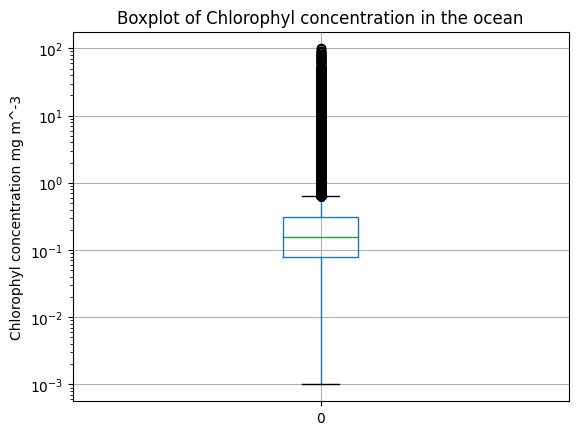

In [23]:
# Boxplot

chl3d_boxplot = chl3d_flattened_df.boxplot()
chl3d_boxplot.set_yscale('log')
chl3d_boxplot.title.set_text('Boxplot of Chlorophyl concentration in the ocean')
chl3d_boxplot.set_ylabel(f'Chlorophyl concentration {chl_units}')
plt.show()


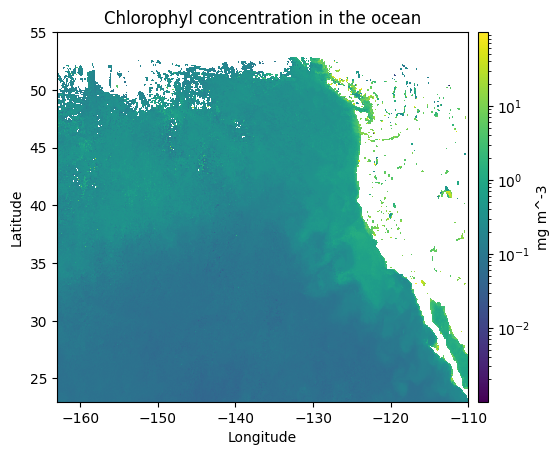

In [24]:
plt.figure(1)
plt.pcolor(lon,lat,chl3d[-1,:,:],norm=colors.LogNorm(vmin=min_chl, vmax=max_chl),cmap='viridis', shading='auto')
colorbar = plt.colorbar(pad=0.02,aspect=40)
colorbar.set_label(chl_units)
plt.title('Chlorophyl concentration in the ocean')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [25]:
# NOT WORKING

from mpl_toolkits.basemap import Basemap
from matplotlib.colors import LogNorm

fig, axes=plt.subplots(figsize=(10,10))

m=Basemap(projection='mill',lat_ts=15,llcrnrlon=lon.min(), \
          urcrnrlon=lon.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
          resolution='i')

m.drawcoastlines()

x,y=m(*np.meshgrid(lon,lat))

m.pcolormesh(x,y,chl3d[-1,:,:],shading='gouraud',norm=LogNorm(vmin=MIN,vmax=MAX),cmap=plt.cm.jet)
m.fillcontinents(color='0.6')

m.drawparallels(np.arange(10,13,1),labels=[1,0,0,0],linewidth=0.7,fontsize=12)
m.drawmeridians(np.arange(-77,-71,1),labels=[0,0,0,1],linewidth=0.7,fontsize=12)


m.colorbar()
plt.show()


ModuleNotFoundError: No module named 'mpl_toolkits.basemap'